In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

In [4]:
# Download necessary NLTK data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nickponzi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#Preprocess
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Perform stemming
    return ' '.join(tokens)

In [7]:
#Dataset
df = pd.read_csv('Reviews.csv')
df['cleaned_text'] = df['Text'].apply(preprocess_text)

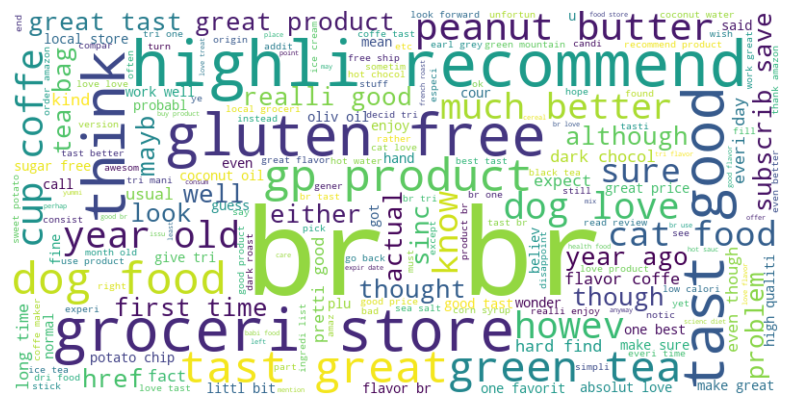

In [8]:
#Create a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
#Sentiment Analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

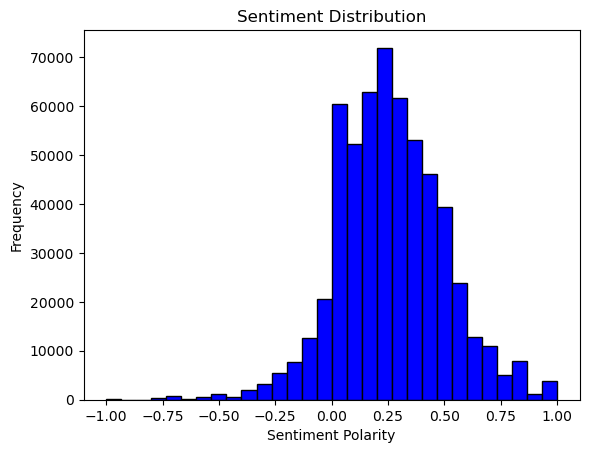

In [10]:
# Plot Sentiment Distribution
plt.hist(df['sentiment'], bins=30, color='blue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(df['cleaned_text'])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df['cleaned_text'])


In [12]:
print(df[['cleaned_text', 'sentiment']].head())


                                        cleaned_text  sentiment
0  bought sever vital can dog food product found ...   0.450000
1  product arriv label jumbo salt peanut peanut a...   0.083333
2  confect around centuri light pillowi citru gel...   0.387500
3  look secret ingredi robitussin believ found go...   0.150000
4  great taffi great price wide assort yummi taff...   0.458333
